In [21]:
library(tidyverse)
library(zeallot)
library(magrittr)
source("../../R/exp-utils.R")
source("../../R/plot-utils.R")
source("../../R/alg/cma-es-csa.R")
source("../../R/alg/cma-es-classic.R")
source("../../R/alg/cma-es-ppmf.R")
source("../../R/alg/cma-es-ppmf-classic.R")
options(repr.plot.width=15, repr.plot.height=6)

#### Funkcje testowe

In [22]:
# F-cja sferyczna
sphere_func = . %>% crossprod(.)
attributes(sphere_func) = c(attributes(sphere_func), name = "sphere")
# Elispoida
ellips_func = function(x, a = 10) {
  N = length(x)
  sum(x^2 * a^((1:N - 1) / (N - 1)))
}
attributes(ellips_func) = c(attributes(ellips_func), name = "ellips")

# F-cja liniowa
linear_func = function(x) {
  x[1]
}
attributes(linear_func) = c(attributes(linear_func), name = "linear")

# F-cja szumowa
noise_func = function(x) {
    rnorm(1)
}
attributes(noise_func) = c(attributes(noise_func), name = "noise")

#### Parametry

In [38]:
dims = c(2, 3, 5, 10)
func_list = list(sphere_func, ellips_func, linear_func, noise_func)
x0 = 100
control = list(
    stopfitness = -Inf
)

In [39]:
csa_data = 
    run_massive_experiments(cma_es_csa, func_list, dims, x0, control)

In [40]:
csa_classic_data = 
    run_massive_experiments(cma_es_classic, func_list, dims, x0, control)

In [41]:
ppmf_data = 
    run_massive_experiments(cma_es_ppmf, func_list, dims, x0, control)

In [42]:
ppmf_classic_data = 
    run_massive_experiments(cma_es_ppmf_classic, func_list, dims, x0, control)

ERROR: Error in eigen(cov(t(arx))): infinite or missing values in 'x'


In [43]:
all_data = 
    merge_results(list(csa_data, csa_classic_data, ppmf_data))#, ppmf_classic_data))

Warning message:
“Removed 8601 row(s) containing missing values (geom_path).”


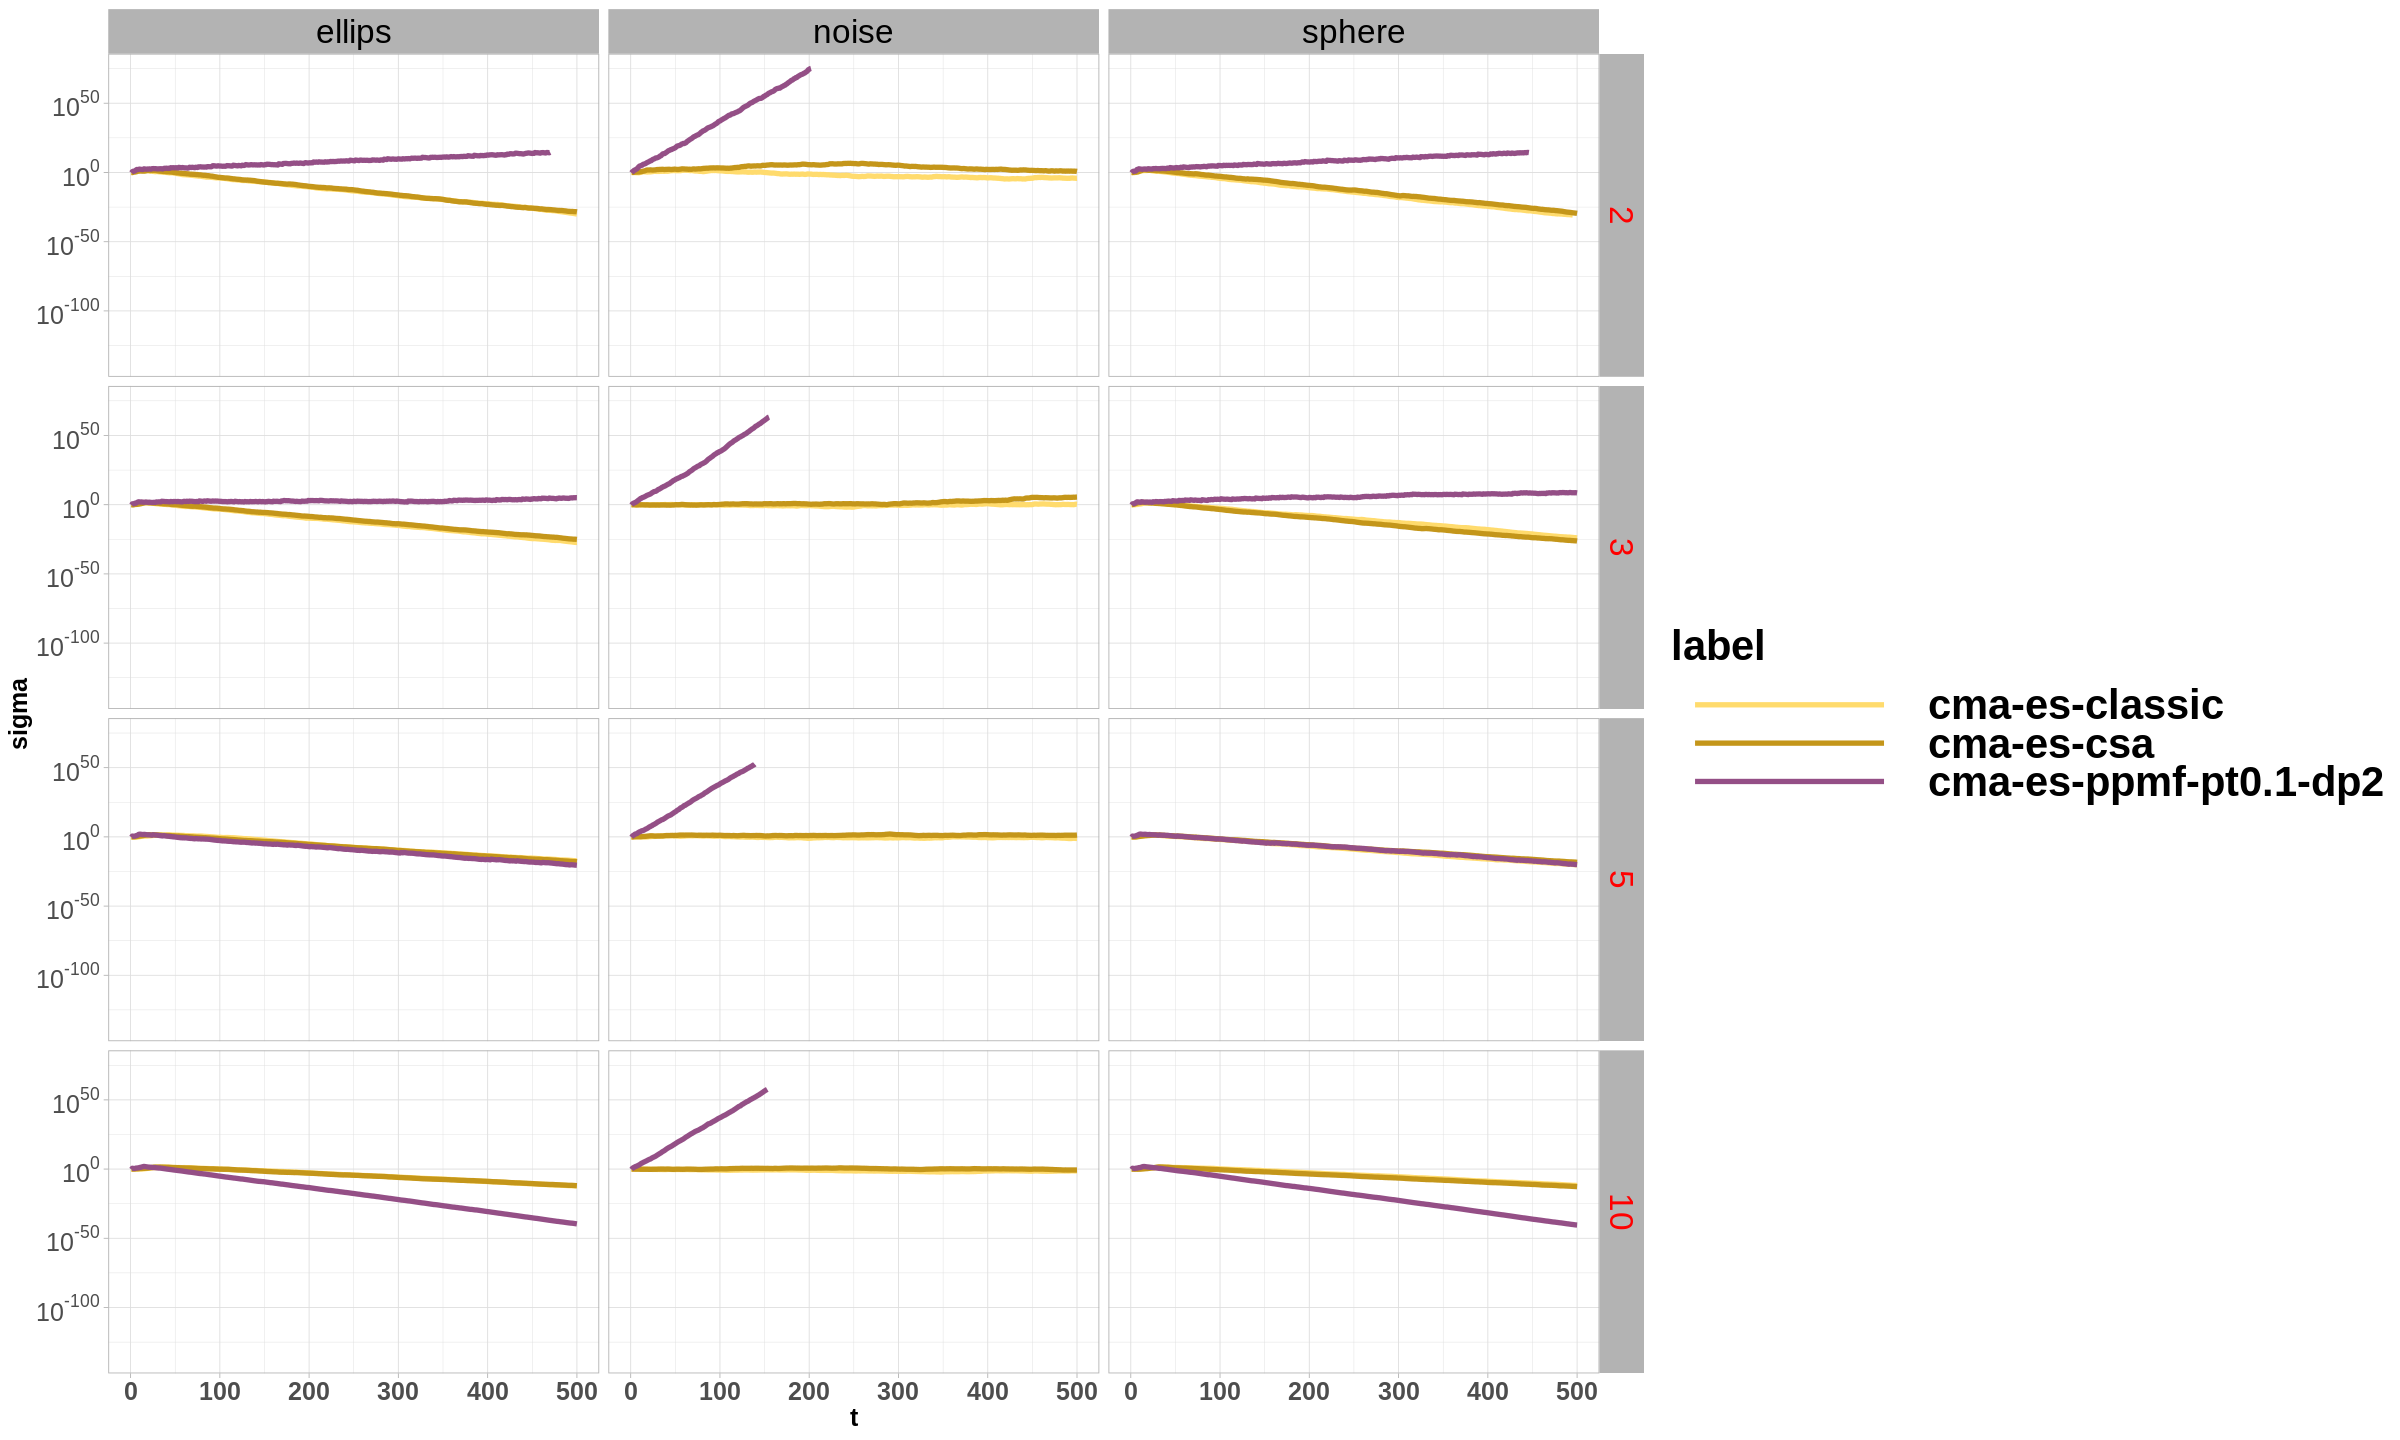

In [52]:
options(repr.plot.width=20, repr.plot.height=12)
all_data %>% dplyr::filter(Func != "linear") %>%
    vg_plot("sigma", scale_y_log = TRUE) + facet_grid(rows = dplyr::vars(Dim), cols = dplyr::vars(Func)) + xlim(0, 500)

Warning message:
“Removed 1291 row(s) containing missing values (geom_path).”


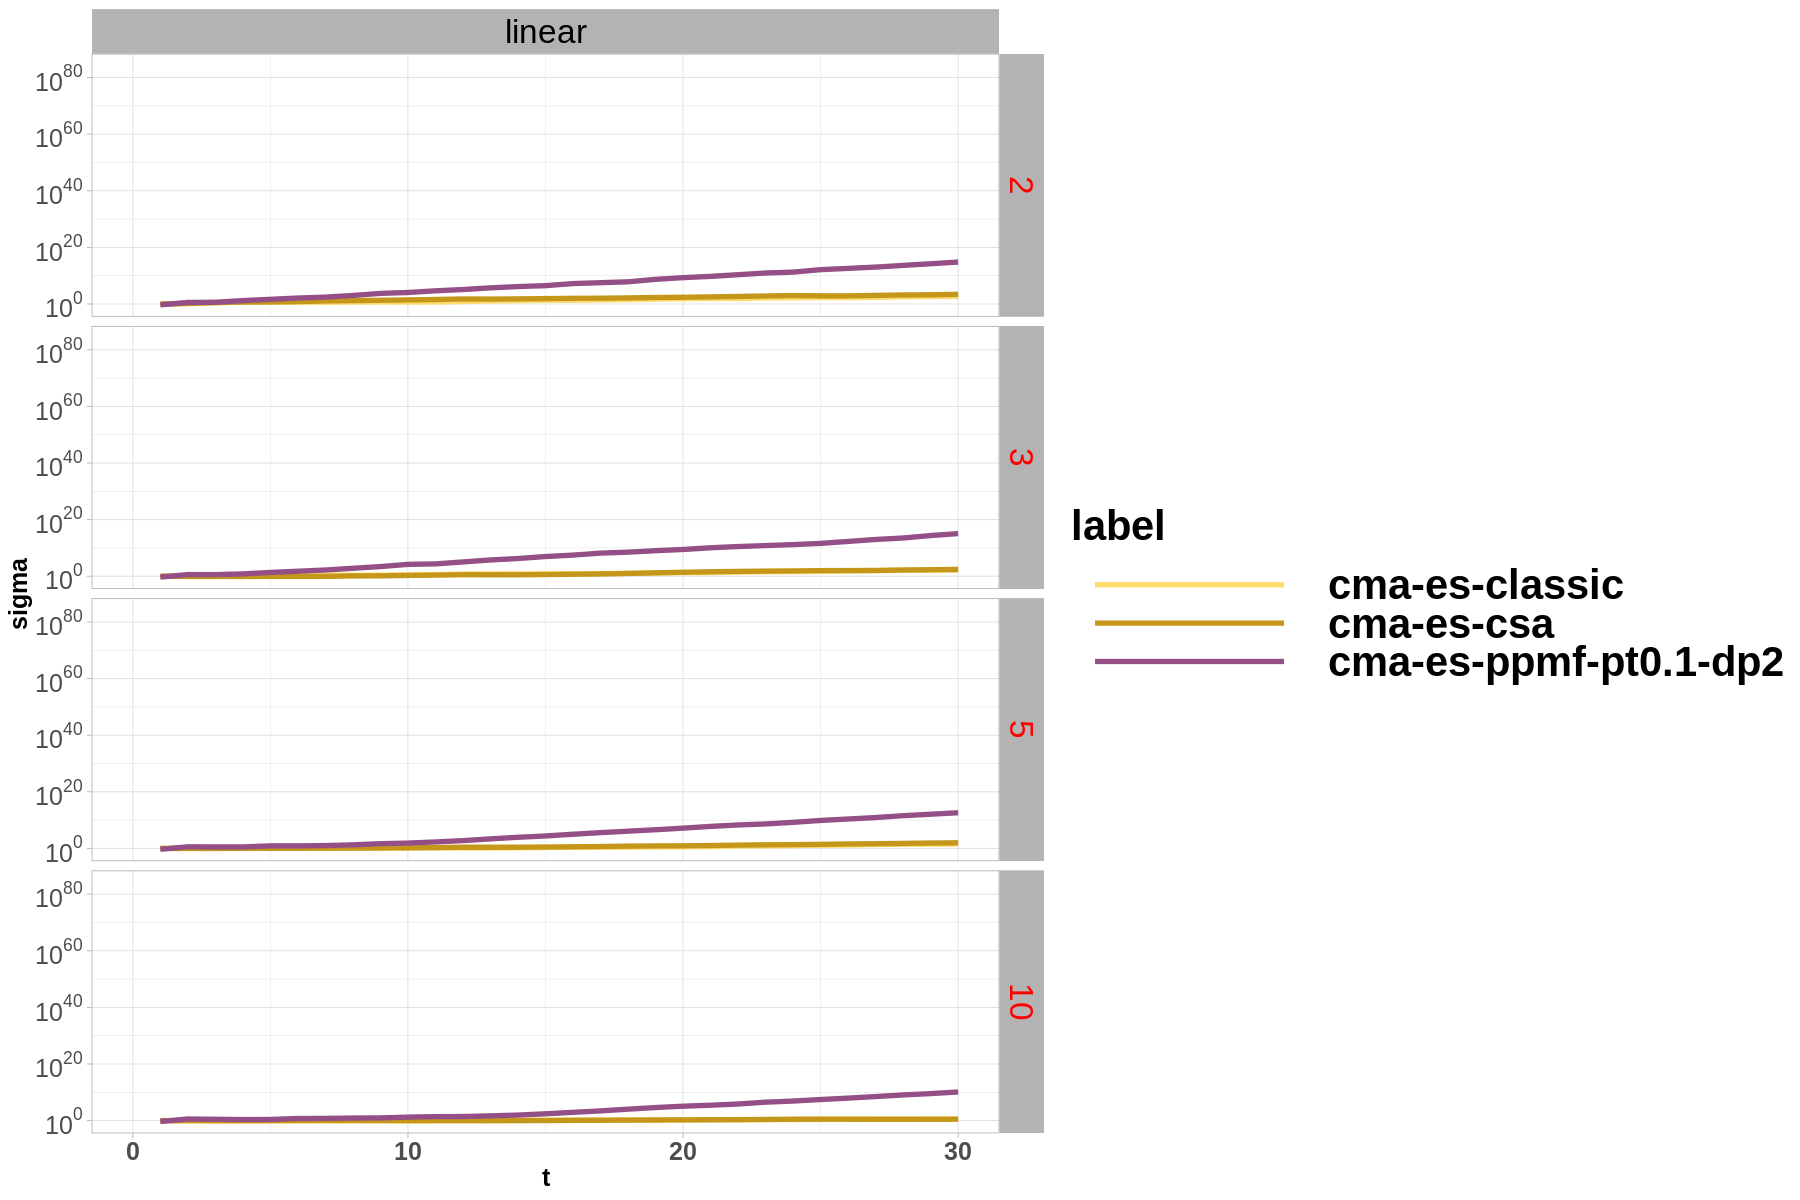

In [47]:
options(repr.plot.width=15, repr.plot.height=10)
all_data %>% dplyr::filter(Func == "linear") %>%
    vg_plot("sigma", scale_y_log = TRUE) + facet_grid(rows = dplyr::vars(Dim), cols = dplyr::vars(Func)) + xlim(0, 30)